In [57]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import numpy as np
from geopandas import GeoDataFrame
from shapely.geometry import Point
from descartes import PolygonPatch
import pandas as pd
import re

In [5]:
# Import voting data at precinct level
NC_precinct_vote = pd.read_csv("/Users/yiliwang/NC_precinct_vote.csv")

In [41]:
NC_precinct_vote_party = NC_precinct_vote[['county','precinct','cd','g2008_USH_rv','g2008_USH_dv']]

In [45]:
# Import geocode data at precinct level
NC_precinct_geo = gpd.read_file("/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/Voting_PRECINCTS_09012012 Shapefile/SBE_PRECINCTS_09012012.shp")

In [76]:
NC_precinct_geo['ENR_DESC'] = [re.sub(r'.*_', '', item) for item in [str(i) for i in NC_precinct_geo['ENR_DESC']]]

In [80]:
# Merge shapefile dataframe with voting dataframe: NC_geo_vote_byPrecinct
NC_geo_vote_byPrecinct = pd.merge(NC_precinct_geo,NC_precinct_vote_party,left_on='ENR_DESC',right_on='precinct',how='inner')

In [109]:
NC_geo_vote_byPrecinct['party_spt_ratio']= party_spt_ratio

In [110]:
NC_geo_vote_byPrecinct

,COUNTY_ID,COUNTY_NAM,ENR_DESC,PREC_ID,geometry,county,precinct,cd,g2008_USH_rv,g2008_USH_dv,party_spt_ratio
0,1,ALAMANCE,NORTH GRAHAM,06N,"POLYGON ((1884558.649606168 851226.3256260008,...",ALAMANCE,NORTH GRAHAM,6,1477.0,951.0,0.643873
1,1,ALAMANCE,BURLINGTON 10,1210,"POLYGON ((1867094.975872174 842884.0693446696,...",ALAMANCE,BURLINGTON 10,6,784.0,479.0,0.610969
2,1,ALAMANCE,EAST GRAHAM,06E,"POLYGON ((1885497.823580846 846796.6756926775,...",ALAMANCE,EAST GRAHAM,6,1362.0,805.0,0.591043
3,1,ALAMANCE,GRAHAM 3,063,"POLYGON ((1885054.110557511 851287.3586404175,...",ALAMANCE,GRAHAM 3,6,1095.0,604.0,0.551598
4,1,ALAMANCE,NORTH BURLINGTON,12N,"POLYGON ((1872167.538561672 854095.3789430112,...",ALAMANCE,NORTH BURLINGTON,6,609.0,277.0,0.454844
5,1,ALAMANCE,BURLINGTON 5,125,"POLYGON ((1863050.497740671 849282.7898149192,...",ALAMANCE,BURLINGTON 5,6,1077.0,378.0,0.350975
6,1,ALAMANCE,PLEASANT GROVE,11,"POLYGON ((1921857.796136335 907860.3731188327,...",ALAMANCE,PLEASANT GROVE,13,518.0,1816.0,3.505792
7,1,ALAMANCE,PLEASANT GROVE,11,"POLYGON ((1921857.796136335 907860.3731188327,...",RANDOLPH,PLEASANT GROVE,6,186.0,38.0,0.204301
8,76,RANDOLPH,PLEASANT GROVE,27,"POLYGON ((1835491.85043025 672515.1653325111, ...",ALAMANCE,PLEASANT GROVE,13,518.0,1816.0,3.505792
9,76,RANDOLPH,PLEASANT GROVE,27,"POLYGON ((1835491.85043025 672515.1653325111, ...",RANDOLPH,PLEASANT GROVE,6,186.0,38.0,0.204301


In [107]:
party_spt_ratio = NC_geo_vote_byPrecinct['g2008_USH_dv']/NC_geo_vote_byPrecinct['g2008_USH_rv'] # party support ratio


(1971,)

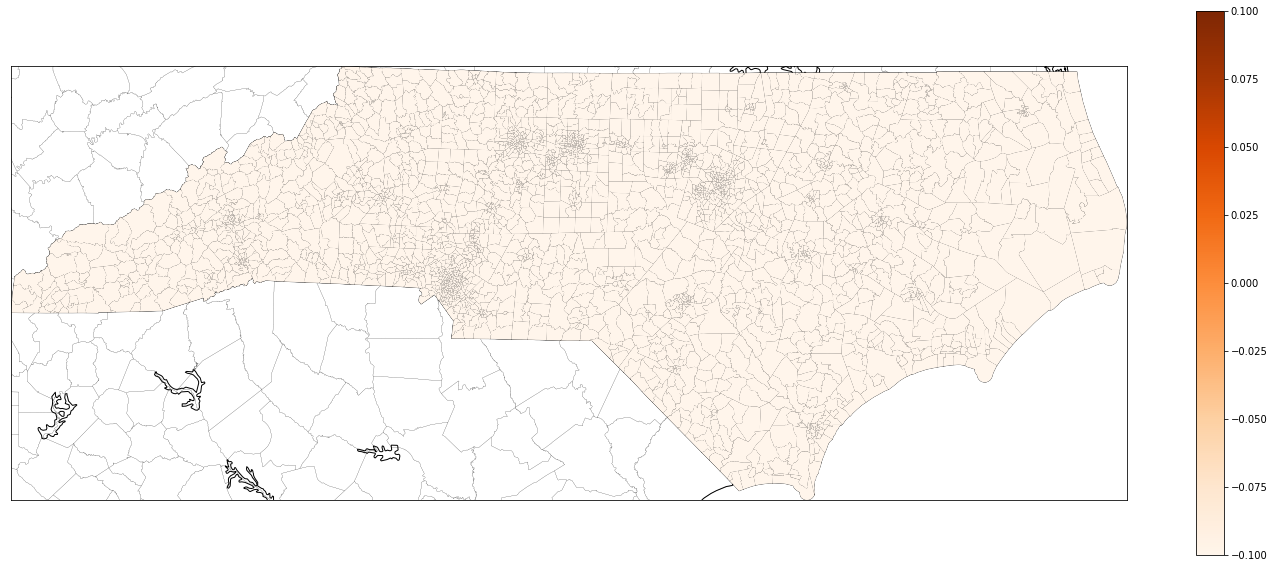

In [113]:
import matplotlib.cm
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

fig, ax = plt.subplots(figsize=(25,25))

m = Basemap(llcrnrlon=-84.3219, llcrnrlat=33.7529, urcrnrlon=-75.4001, urcrnrlat=36.588, resolution="h",
    projection="merc"
)

m.readshapefile("/Users/yiliwang/Downloads/NC_Shapefiles/nc_final", "nc_final") 

m.drawcoastlines()
m.drawcounties()

map_shapes = pd.DataFrame({
        'shapes': [Polygon(np.array(geometry), True) for geometry in m.nc_final]
    })


cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(map_shapes.shapes, zorder=2)


norm = Normalize()
 
#pc.set_facecolor(cmap(norm(party_spt_ratio.fillna(0).values)))
pc.set_facecolor(cmap(norm(NC_geo_vote_byPrecinct['g2008_USH_dv'].values)))

ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
 
mapper.set_array(NC_geo_vote_byPrecinct['g2008_USH_dv'])
plt.colorbar(mapper, shrink=0.4)

In [101]:
data2 = gpd.read_file("/Users/yiliwang/Downloads/NC_Shapefiles/nc_final.shp")

In [102]:
data2

,ALAND10,AV,AWATER10,COUNTYFP10,DSHARE_AG0,DSHARE_AUD,DSHARE_CA0,DSHARE_CL0,DSHARE_GO0,DSHARE_GOV,...,REG10G_UU,REG10G_UW,REG10G_W,STATEFP10,VTDI10,VTDST10,VTD_CODE,VTD_KEY,VTD_NAME,geometry
0,1951716,0.478411,32157,001,0.617054,0.472973,0.478125,0.463722,0.522979,0.469169,...,3,183,714,37,P,06W,06W,3700106W,06W,"POLYGON ((-79.413951 36.084506, -79.413442 36...."
1,2887286,0.593708,0,001,0.706977,0.530693,0.615832,0.617925,0.690224,0.514395,...,18,190,812,37,P,12E,12E,3700112E,12E,"POLYGON ((-79.413951 36.084506, -79.4140379999..."
2,2631987,0.461732,0,001,0.603774,0.437599,0.427155,0.428462,0.490509,0.410979,...,14,367,1608,37,P,12W,12W,3700112W,12W,"POLYGON ((-79.44722899999999 36.087287, -79.44..."
3,4284967,0.621661,10517,001,0.724036,0.588721,0.634183,0.643019,0.666918,0.576043,...,25,284,1133,37,P,06N,06N,3700106N,06N,"POLYGON ((-79.391234 36.088163, -79.390697 36...."
4,3077044,0.357747,40233,001,0.552595,0.376176,0.278336,0.296323,0.360861,0.341394,...,13,293,1663,37,P,126,126,37001126,126,"POLYGON ((-79.473235 36.096244, -79.4730129999..."
5,2534308,0.461643,51904,001,0.615693,0.474053,0.413821,0.418775,0.483633,0.442988,...,10,302,1422,37,P,124,124,37001124,124,"POLYGON ((-79.473235 36.096244, -79.4738 36.09..."
6,3101990,0.468260,3886,001,0.610842,0.427350,0.458374,0.475957,0.550540,0.401284,...,11,280,1045,37,P,1210,1210,370011210,1210,POLYGON ((-79.44967199999999 36.06506299999999...
7,5860824,0.428899,88677,001,0.570778,0.397750,0.373839,0.401480,0.454373,0.370476,...,45,695,2986,37,P,03N,03N,3700103N,03N,"POLYGON ((-79.526477 36.081639, -79.526797 36...."
8,76233240,0.252739,2918960,001,0.415631,0.261006,0.186047,0.212313,0.299954,0.249499,...,11,636,2933,37,P,02,2,3700102,2,"POLYGON ((-79.42622299999999 36.016516, -79.42..."
9,6167324,0.496334,15656,001,0.645727,0.475894,0.485480,0.505585,0.561934,0.454681,...,19,287,1355,37,P,06E,06E,3700106E,06E,"POLYGON ((-79.36550199999999 36.077022, -79.36..."
